In [95]:
import pandas as pd
import numpy as np

In [96]:
b_cancer = pd.read_csv('data.csv')
b_cancer.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [97]:
b_cancer.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,1.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,1.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474283,6.881763,269.978250,1.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,2.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,2.000000


In [98]:
b_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


In [99]:
b_cancer.dtypes

Age                 int64
BMI               float64
Glucose             int64
Insulin           float64
HOMA              float64
Leptin            float64
Adiponectin       float64
Resistin          float64
MCP.1             float64
Classification      int64
dtype: object

In [100]:
columns = b_cancer.columns
unique_values = {}
for column in columns:
    unique_values[column] = b_cancer[column].unique()
unique_values

{'Age': array([48, 83, 82, 68, 86, 49, 89, 76, 73, 75, 34, 29, 25, 24, 38, 44, 47,
        61, 64, 32, 36, 35, 54, 45, 50, 66, 53, 28, 43, 51, 67, 69, 60, 77,
        71, 78, 85, 42, 62, 59, 46, 72, 55, 41, 81, 65, 58, 40, 52, 74, 57],
       dtype=int64),
 'BMI': array([23.5       , 20.69049454, 23.12467037, 21.36752137, 21.11111111,
        22.85445769, 22.7       , 23.8       , 22.        , 23.        ,
        21.47      , 23.01      , 22.86      , 18.67      , 23.34      ,
        20.76      , 22.03      , 32.03895937, 34.5297228 , 36.51263743,
        28.57667585, 31.97501487, 32.27078777, 30.27681661, 30.48315806,
        37.03560819, 38.57875854, 31.44654088, 35.2507611 , 34.17489   ,
        36.21227888, 36.7901662 , 35.85581466, 34.42217362, 27.68877813,
        29.60676726, 31.2385898 , 35.09270153, 26.34929208, 35.58792924,
        29.2184076 , 27.2       , 27.3       , 32.5       , 30.3       ,
        27.7       , 25.7       , 25.3       , 29.4       , 26.6       ,
      

In [101]:
X = b_cancer.drop('Classification', axis=1)
y = b_cancer['Classification']

In [115]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit_transform(X)

In [116]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [117]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [118]:
lr.score(X_test, y_test)

0.5833333333333334

In [128]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFFS

sffs = SFFS(lr, forward=True, floating=True, k_features=4 ,scoring='accuracy', cv=0)

In [129]:
sffs.fit(X_train, y_train)

SequentialFeatureSelector(cv=0, estimator=LogisticRegression(max_iter=1000),
                          floating=True, k_features=(4, 4), scoring='accuracy')

In [132]:
sffs.subsets_[4]

{'feature_idx': (1, 2, 3, 7),
 'cv_scores': array([0.86956522]),
 'avg_score': 0.8695652173913043,
 'feature_names': ('BMI', 'Glucose', 'Insulin', 'Resistin')}

C:\Users\Utilisateur\miniconda3\Lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Utilisateur\miniconda3\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


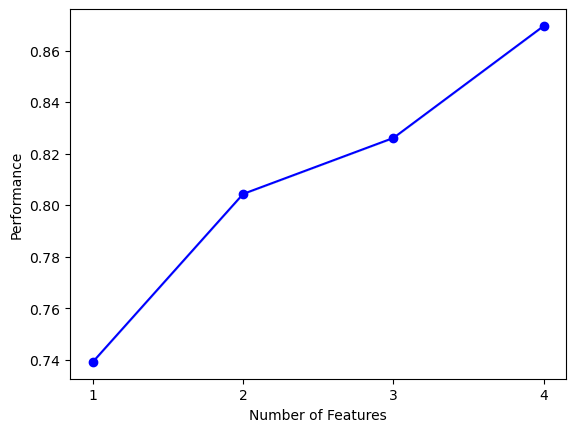

In [133]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sffs
import matplotlib.pyplot as plt

plot_sffs(sffs.get_metric_dict())
plt.show()